# Ridge (L$_{2}$) Regularization
To prevent overfitting (and reduce variance), in the cost function, add a penalty on the squares of the coefficients: $$
J(\vec{\beta}) = \boldsymbol{MSE}(\vec{\beta}) + \lambda\sum_{i=1}^m \beta_{j}^2
$$where $\lambda \geq 0$ is a hyperparameter that controls the extent of regularization.

The derivative with respect to $\beta_{0}$ will remain unchanged, so we still have the same result as in simple linear regression (OLS): $\beta_{0} = \bar{y} - m \bar{x}$. Moreover, the first term in 

## 2-Dimensional Case
The equation for b ($\beta_{0}$) will remain the same as in simple linear regression, because the derivative of the second term (with respect to $b$) is $0$. Thus, we have $$\bar{y} - m \bar{x} = b$$

Moreover, in simple linear regression, by setting $\frac{\partial J}{\partial m} = 0$ , we had this intermediary equation: $$
\,m \sum_{i=1}^n (x_i-\bar x)^2
= \sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)     \,
$$
It is to see that the effect of regularization (the term ) $\lambda\sum_{i=1}^m \beta_{j}^2$ in the cost function will just be the following term added to the left side of this above equation, that is, we will have: $$
\,m \sum_{i=1}^n (x_i-\bar x)^2 + \lambda m
= \sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)     \,
$$
Thus, we arrive at the closed form solution for Ridge Regression in 2D: $$
m
= \frac{\sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)}
       {\sum_{i=1}^n (x_i-\bar x)^2 + \lambda},\qquad
b=\bar y - m\bar x
$$

Defining $X_{c}$ and $Y_{c}$ as $x_i-\bar x$ and $y_i-\bar y$  for $1\leq i\leq n$, we have the vectorized result: $$ m = 
\boxed{\frac{\vec{X_{c}} \hspace{0.1cm} \cdot \hspace{0.1cm} \vec{Y_{c}}}{\vec{X_{c}} \hspace{0.1cm} \cdot \hspace{0.1cm} \vec{X_{c} \hspace{0.1cm}+\lambda}}} ,\qquad
\boxed{\,b=\bar y - m\bar x\,}.
$$

### Implementation of 2D Ridge Regression

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=20, random_state=13)

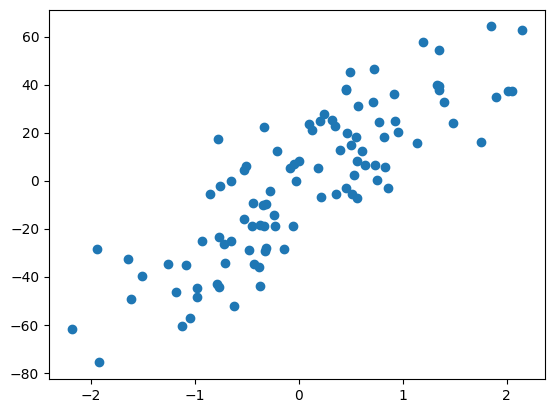

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


(80,)

In [8]:
import numpy as np
from typing import Iterable

class CustomRidgeRegression:
    def __init__(self, alpha:float = 1.0):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X = np.asarray(X_train, dtype=float)
        y = np.asarray(y_train, dtype=float)

        # input validation 
        if X.size == 0 or y.size == 0:
            raise ValueError("X_train and y_train must be non-empty.")
        if X.size != y.size:
            raise ValueError("X_train and y_train must have the same length.")
        if X.ndim != 1 or y.ndim != 1:
            raise ValueError("CustomLR supports only 1D inputs.")
        if not np.isfinite(X).all() or not np.isfinite(y).all():
            raise ValueError("Inputs contain NaN or infinite values.")

        # compute slope and intercept 
        self.x_bar, self.y_bar = X.mean(), y.mean()
        X_c, y_c = X - self.x_bar, y - self.y_bar

        denom = np.dot(X_c, X_c) + self.alpha
        if denom == 0.0:
            raise ValueError("All X values are identical; slope is undefined.")

        self.m = np.dot(X_c, y_c) / denom
        self.b = self.y_bar - self.m * self.x_bar
        return self

    def predict(self, X_test: Iterable[float]) -> np.ndarray:
        """Predict outputs for new 1D input data."""
        if self.m is None or self.b is None:
            raise ValueError("Model is not fitted yet. Call fit() first.")

        X = np.asarray(X_test, dtype=float)
        if X.ndim != 1:
            raise ValueError("CustomLR supports only 1D inputs.")
        return self.m * X + self.b        

In [14]:
custom_ridge = CustomRidgeRegression()
custom_ridge.fit(X_train.ravel(), y_train)

In [16]:
y_preds = custom_ridge.predict(X_test.ravel())

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.6360228303695721

## n-dimensional Case

In multiple Linear Regression, we arrived ar the following vectorized equation for the cost function: $$
J(\boldsymbol{\beta}) = \boldsymbol{Y^TY}-2\boldsymbol{Y^TX\beta} - \boldsymbol{\beta ^TX^TX\beta}
$$
For n-dimensional Ridge Regression, we want to add the term $\lambda\sum_{i=1}^m \beta_{j}^2$ to the above cost function. Notice that the intercept is not penalized (because only slopes matter for regularization, so it does not help prevent overfitting. moreover, it breaks translation invariance.) Thus, in vectorized form, we cannot simply add the term $\vec{\beta^T} \cdot \vec{\beta}$ . Hence, we add the following term to the cost function:
$$\vec{\beta}\Lambda \beta$$
where $\Lambda = diag(0, 1, \dots, 1)$
Thus, we arrive at the vectorized form of the cost function for n-dimensional Ridge Regression:
$$\boxed{\,J(\boldsymbol{\beta}) = \boldsymbol{Y^TY}-2\boldsymbol{Y^TX\beta} - \boldsymbol{\beta ^TX^TX\beta}
+ \lambda\vec{\beta}\Lambda \beta}$$

In multiple linear regression, we had found the following intermediary equation:  $$
 \frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 - 2\boldsymbol{Y^TX} - 2 \boldsymbol{\beta^TX^T X}
$$ It is clear that for our case we just have to add the derivative of the regularization term to the above equation:

$$
R = \lambda\, \beta^T \Lambda \beta.
$$

We use the identity:

$$
\frac{\partial}{\partial \beta} (\beta^T A \beta) = (A + A^T)\beta.
$$

Since $\Lambda$ is diagonal, it is symmetric:

$$
\Lambda^T = \Lambda.
$$

So:

$$
\nabla_\beta R
= \lambda (\Lambda + \Lambda^T)\beta
= \lambda (2\Lambda)\beta
= 2\lambda\,\Lambda\beta.
$$

Thus, we arrive at:  $$
 \frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 - 2\boldsymbol{Y^TX} - 2 \boldsymbol{\beta^TX^T X} + 2\lambda\,\Lambda\beta.
$$

Using the identity 
$$
\frac{\partial (\beta^T A \beta)}{\partial \beta} = (A + A^T)\beta = 2A\beta,
$$
which applies since $\boldsymbol{A} = \boldsymbol{X^T X}$ and $\Lambda$ are symmetric, we obtain:

$$
-2\boldsymbol{Y^T X} - 2\boldsymbol{\beta^T X^T X} + 2\lambda\,\Lambda \boldsymbol{\beta} = 0.
$$

divide by $2$ and rearrange:

$$
\boldsymbol{Y^T X} = \boldsymbol{\beta^T X^T X} - \lambda\, \boldsymbol{\beta^T \Lambda}.
$$

transpose both sides:

$$
\boldsymbol{X^T Y} = (X^T X)\boldsymbol{\beta} + \lambda\,\Lambda \boldsymbol{\beta}.
$$

factor out $\boldsymbol{\beta}$:

$$
\boldsymbol{X^T Y} = \bigl(X^T X + \lambda \Lambda\bigr)\boldsymbol{\beta}.
$$

solving for $\boldsymbol{\beta}$ gives us the closed-form solution for n-dimensional Ridge regression:

$$
\boxed{
\boldsymbol{\beta} 
= \bigl(X^T X + \lambda \Lambda\bigr)^{-1} X^T Y
}
$$


In [20]:
class NDCustomRidgeRegression:
    def __init__(self, alpha: float = 1.0):
        self.alpha = alpha
        self.beta = None           
        self.coef_ = None          
        self.intercept_ = None     

    def fit(self, X_train, y_train):
        X = np.asarray(X_train, dtype=float)
        y = np.asarray(y_train, dtype=float)

        if X.ndim == 1:
            X = X.reshape(-1, 1)

        if y.ndim != 1:
            raise ValueError("y_train must be a 1D array.")

        if X.shape[0] != y.shape[0]:
            raise ValueError("X_train and y_train must have the same number of rows.")

        if not np.isfinite(X).all() or not np.isfinite(y).all():
            raise ValueError("Inputs contain NaN or infinite values.")

        n_samples, n_features = X.shape

        X_design = np.column_stack([np.ones(n_samples), X])

        # The first entry is 0 so we don't regularize the intercept.
        Lambda = np.eye(n_features + 1)
        Lambda[0, 0] = 0

        # Compute the ridge-regularized normal equation pieces
        XtX = X_design.T @ X_design
        Xty = X_design.T @ y

        # Solve for beta using the closed-form ridge regression formula
        A = XtX + self.alpha * Lambda
        self.beta = np.linalg.inv(A) @ Xty

        self.intercept_ = self.beta[0]
        self.coef_ = self.beta[1:]
        return self

    def predict(self, X_test):
        if self.beta is None:
            raise ValueError("Model is not fitted yet—call fit() first.")

        X = np.asarray(X_test, dtype=float)

        # Allow 1D input for convenience
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        return self.intercept_ + X @ self.coef_

# Gradient Descent for N-Dimensional Ridge Regression
Using the cost function above, we apply gradient descent by iterating the following updates: $$
\vec{\beta}=\vec{\beta} - \alpha\frac{\partial J}{\partial\vec{\beta}}
$$
above, we had found the gradient: $$
-2\boldsymbol{Y^T X} - 2\boldsymbol{\beta^T X^T X} + 2\lambda\,\Lambda \boldsymbol{\beta} = \frac{\partial J}{\partial\vec{\beta}}
$$
Thus, the update rule becomes:

$$
\boxed{
\vec{\beta}
\leftarrow 
\vec{\beta}
- 2\alpha\left( 
(X^T X + \lambda \Lambda)\,\vec{\beta}
- X^T Y
\right)
}
$$



In [23]:
class CustomRidgeGD:
    def __init__(self, alpha=1.0, lr=0.001, n_iters=1000):
        self.alpha = alpha        # regularization strength λ
        self.lr = lr              # learning rate η
        self.n_iters = n_iters    # number of gradient descent steps
        self.beta = None          # full parameter vector (intercept + weights)
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X_train, y_train):
        X = np.asarray(X_train, dtype=float)
        y = np.asarray(y_train, dtype=float)

        # Turn 1D input into 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim != 1:
            raise ValueError("y_train must be a 1D vector.")

        n_samples, n_features = X.shape

        # Add the intercept column
        X_design = np.column_stack([np.ones(n_samples), X])

        # Ridge penalty matrix (no penalty on intercept)
        Lambda = np.eye(n_features + 1)
        Lambda[0, 0] = 0

        # Initialize 
        self.beta = np.zeros(n_features + 1)

        XtX = X_design.T @ X_design
        Xty = X_design.T @ y

        # Gradient descent iterations
        for _ in range(self.n_iters):
            # Gradient:
            grad = 2 * ((XtX + self.alpha * Lambda) @ self.beta - Xty)

            # Update beta
            self.beta -= self.lr * grad

        # Store intercept and slope coefficients separately
        self.intercept_ = self.beta[0]
        self.coef_ = self.beta[1:]
        return self

    def predict(self, X_test):
        if self.beta is None:
            raise ValueError("Model is not fitted yet. Call fit() first.")

        X = np.asarray(X_test, dtype=float)

        # Allow simple 1D input
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        return self.intercept_ + X @ self.coef_


# Lasso Regression
The Lasso cost function is:

$$
J(\beta) = MSE(\beta) + \lambda \sum_{i=1}^{p} |\beta_i|.
$$

In vectorized form, this is
$$
J(\beta) = (Y - X\beta)^{T}(Y - X\beta) + \lambda \|\beta\|_{1}.
$$

where

$$
\|\beta\|_{1} = \sum_{i=1}^{p} |\beta_i|.
$$


While in Ridge the penalty term was: $\lambda \beta^{2}$ and its derivative was $\frac{d}{d\beta}\left( \lambda \beta^{2} \right)= 2\lambda \beta$ which is proportional to $\beta$, hence could only equal 0 if $\beta$ itself was 0. Moreover, this had the effect that bigger coefficients would shrink more. However, in Lasso, we have the derivative of the penalty:

$$
\frac{d}{d\beta}\left( \lambda |\beta| \right)
=
\begin{cases}
\lambda, & \beta > 0 \\
-\lambda, & \beta < 0 \\
[-\lambda, \lambda], & \beta = 0
\end{cases}
$$

For all nonzero $\beta$, the shrinkage force is constant, not proportional. This means:

- Big coefficients and small coefficients are shrunk by the same amount, not proportionally.  
- Lasso applies equal pressure to push all parameters toward zero.  
- That pressure does not get stronger with larger $\beta$ (unlike ridge).


## Sparsity in Lasso Regression

From before, we have the derivative of the MSE:

$$
\frac{d}{d\beta}(A\beta^{2} - 2B\beta)
= 2A\beta - 2B.
$$

For the Lasso part:

$$
\frac{d}{d\beta}(\lambda|\beta|)
=
\begin{cases}
\lambda, & \beta > 0 \\
-\lambda, & \beta < 0 \\
[-\lambda, \lambda], & \beta = 0
\end{cases}
$$



 Case 1: $( \beta > 0 \)$

$$
2A\beta - 2B + \lambda = 0
$$

Solve for \( \beta \):

$$
\beta = \frac{B - \lambda/2}{A}.
$$

This solution only makes sense if:

$$
B > \frac{\lambda}{2}.
$$


Case 2: $( \beta < 0 \)$

$$
2A\beta - 2B - \lambda = 0
$$

Solve:

$$
\beta = \frac{B + \lambda/2}{A}.
$$

This solution only holds if:

$$
B < -\frac{\lambda}{2}.
$$


Case 3: $( \beta = 0 \)$

At zero, the subgradient is the interval:

$$
[-\lambda, \lambda].
$$

We get a valid optimum at \( \beta = 0 \) if:

$$
-\lambda \le 2B \le \lambda
$$

which simplifies to:

$$
|B| \le \frac{\lambda}{2}.
$$


Putting all three cases together:

$$
\beta^\ast =
\begin{cases}
\dfrac{B - \lambda/2}{A}, & B > \lambda/2 \\[8pt]
0, & |B| \le \lambda/2 \\[8pt]
\dfrac{B + \lambda/2}{A}, & B < -\lambda/2
\end{cases}
$$

**The above solution shows why Lasso creates sparsity:**

**There is a whole region, $( |B| \le \lambda/2 )$, where the optimal coefficient is exactly 0.**
**Therefore, Lasso naturally performs feature selection by setting many coefficients to 0**
